# Laboratorium 1 

In [1]:
%matplotlib inline
#%matplotlib notebook

In [15]:
from matplotlib import pyplot as plt
from matplotlib import animation
import numpy as np
import pandas as pd


In [16]:
def add_grain(grid, X, Y): 
    grid[X,Y] += 1


def avalanche(field: np.array):
    result = field.copy()
    top = np.where(result>=4)
    result[top] = 0

    for x, y in zip(*top):
        if x < edge_size-1:
            result[x+1, y] += 1
        if x > 0:
            result[x-1, y] += 1
        if y < edge_size-1:
            result[x, y+1] += 1
        if y > 0:
            result[x, y-1] += 1
    return result

def is_avalanche(grid: np.array) -> bool:
    top = np.where(grid>=4)
    if len(top[0])!=0:
        #print("AVALANCHE")
        #print("top:", top)
        return True
    #print("No avalanche")
    return False

def draw_imshow(field):
    plt.imshow(field, cmap="Greys")
    plt.colorbar()
    plt.show()

## Symulacja kratownicy 10x10

UWAGA! Nie udało się uruchomić animacji w trybie "inline", uzyty został moduł "tk". Aby zobaczyć animację, nalezy uruchomić notebook. 
Symulacja uruchomi się w oddzielnym oknie. 

Zastępczo zostało umieszczone łącze do GIFa.

In [17]:
%matplotlib tk
fig, ax = plt.subplots(figsize=(15,15))
ims = []

iters = 100
edge_size = 10
result = np.random.randint(low=0,high=4,size=(edge_size, edge_size))
avalanche_size = 0

for i in range(iters):

    if is_avalanche(result):
        result = avalanche(result)
    else:
        row = np.random.randint(low=0, high=edge_size)
        col = np.random.randint(low=0, high=edge_size)
        #print("Adding grain:", row, col)
        add_grain(result, X=row, Y=col)
    im = ax.imshow(result, cmap="Greys")
    if i==0:
        ax.imshow(result,cmap="Greys")
    ims.append([im])


ani = animation.ArtistAnimation(fig, ims, interval=500, blit=False, repeat_delay=1000)

plt.show()


![avalanche10x10](gifs/avalanche10x10.mov.gif "10x10")

## Symulacja 100x100

UWAGA! Nie udało się uruchomić animacji w trybie "inline", uzyty został moduł "tk". Aby zobaczyć animację, nalezy uruchomić notebook. 
Symulacja uruchomi się w oddzielnym oknie. 

Zastępczo zostało umieszczone łącze do GIFa.

In [18]:
%matplotlib tk
fig, ax = plt.subplots(figsize=(15,15))
ims = []

iters=100
edge_size = 100
result = np.random.randint(low=0,high=4,size=(edge_size, edge_size))
avalanche_size = 0

for i in range(iters):
    if is_avalanche(result):
        result = avalanche(result)
    else:
        row = np.random.randint(low=0, high=edge_size)
        col = np.random.randint(low=0, high=edge_size)
        #print("Adding grain:", row, col)
        add_grain(result, X=row, Y=col)
    im = ax.imshow(result, cmap="Greys")
    if i==0:
        ax.imshow(result,cmap="Greys")
    ims.append([im])


ani = animation.ArtistAnimation(fig, ims, interval=1000, blit=False, repeat_delay=1000)

plt.show()

![avalanche100x100](gifs/avalanche100x100.mov.gif "100x100")

## Sekwencja symulacji usypywania stosów

Wykres N(s):

s - rozmiar lawiny 

N - liczba lawin

UWAGA! Nie udało się uruchomić animacji w trybie "inline", uzyty został moduł "tk". Aby zobaczyć animację, nalezy uruchomić notebook. 
Symulacja uruchomi się w oddzielnym oknie. 

In [19]:
def avalanche_with_size(grid: np.array):
    result = grid.copy()
    top = np.where(result>=4)
    #print("subavalanche size:", top[0].size)
    subavalanche = top[0].size
    result[top] = 0

    for x, y in zip(*top):
        if x < edge_size-1:
            result[x+1, y] += 1
        if x > 0:
            result[x-1, y] += 1
        if y < edge_size-1:
            result[x, y+1] += 1
        if y > 0:
            result[x, y-1] += 1
    
    return result, subavalanche


In [20]:
%matplotlib tk
fig, ax = plt.subplots(figsize=(15,15))
ims = []

iters=500
edge_size = 100
result = np.random.randint(low=0,high=4,size=(edge_size, edge_size))
# list of tuples (av_time, av_size):
avalanches = []
avalanche_size = 0
avalanche_time = 0

for i in range(iters):
    if is_avalanche(result):
        result, subav = avalanche_with_size(result)
        avalanche_size+=subav
        avalanche_time+=1
    else:
        if avalanche_time!=0:
            #print("saving avalanche...")
            avalanches.append((avalanche_time, avalanche_size))
        avalanche_time = 0
        avalanche_size = 0
        row = np.random.randint(low=0, high=edge_size)
        col = np.random.randint(low=0, high=edge_size)
        #print("Adding grain:", row, col)
        add_grain(result, X=row, Y=col)
    im = ax.imshow(result, cmap="Greys")
    if i==0:
        ax.imshow(result,cmap="Greys")
    ims.append([im])

print("number of avalanches:", len(avalanches))
print(avalanches)

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=False, repeat_delay=1000)
plt.show()

number of avalanches: 75
[(1, 1), (2, 2), (1, 1), (2, 2), (4, 8), (2, 2), (1, 1), (1, 1), (2, 2), (2, 2), (2, 2), (10, 11), (5, 5), (3, 3), (1, 1), (2, 3), (2, 2), (2, 2), (5, 8), (5, 9), (4, 4), (1, 1), (2, 2), (2, 2), (1, 1), (1, 1), (1, 1), (4, 6), (2, 2), (4, 4), (1, 1), (7, 12), (1, 1), (3, 4), (1, 1), (1, 1), (2, 2), (1, 1), (2, 3), (5, 6), (3, 3), (1, 1), (5, 6), (7, 8), (2, 2), (1, 1), (5, 9), (6, 6), (4, 4), (4, 7), (1, 1), (1, 1), (1, 1), (4, 4), (2, 2), (1, 1), (2, 2), (2, 2), (2, 2), (3, 4), (4, 4), (2, 2), (1, 1), (4, 4), (2, 3), (5, 5), (5, 8), (2, 2), (1, 1), (3, 4), (2, 2), (2, 2), (5, 5), (11, 12), (1, 1)]


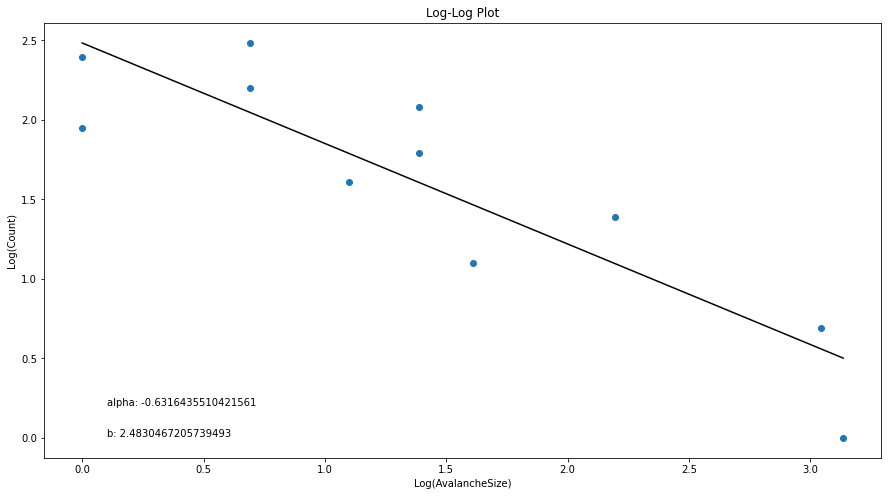

In [21]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,8))
df = pd.DataFrame(avalanches, columns=['AvalancheTime','AvalancheSize'])
df.reset_index(inplace=True)
sizes = df['AvalancheSize'].value_counts()

sizes_df = sizes.to_frame()
sizes_df.reset_index(inplace=True)

xlog = np.log(sizes_df["AvalancheSize"])
ylog = np.log(sizes_df["index"])

alpha,b = np.polyfit(xlog, ylog, 1)

poly1d_fn = np.poly1d([alpha, b])

ax.scatter(xlog, ylog)
ax.plot(xlog, poly1d_fn(xlog), 'black')
ax.text(0.1, 0.2, "alpha: "+str(alpha))
ax.text(0.1, 0.01, "b: "+str(b))
ax.set_xlabel('Log(AvalancheSize)')
ax.set_ylabel('Log(Count)')
ax.set_title('Log-Log Plot')

plt.show()

Wyznaczona zaleznosc jest potęgowa, wartość alpha jest ujemna, tzn. ilość wystąpień wyzszych rozmiarów lawiny spada wykladniczo wraz ze wzorem: 

N(s) = s^(-alpha) = 1/(s^alpha)

## Dodatkowe GIFy ciekawych przebiegów lawiny, rozmary 100x100 oraz 10x10

### 100x100, wycinek z 500 iteracji:

![Long_100x100](gifs/long_av100x100.mov.gif "long_100x100")

### 100x100 wycinek z 100 iteracji:

![Long2_100x100](gifs/long2_av100x100.mov.gif "long2_100x100")

### 10x10 wycinek z 500 iteracji:

![long_10x10](https://github.com/FilipKatulski/complex-systems/blob/main/LAB1/gifs/long_av10x10.mov.gif "long_10x10")

### 10x10 wycinek z 500 iteracji:

![long2_10x10](https://github.com/FilipKatulski/complex-systems/blob/main/LAB1/gifs/long2_av10x10.mov.gif "long2_10x10")

### 10x10 wycinek z 100 iteracji:

![short_10x10](https://github.com/FilipKatulski/complex-systems/blob/main/LAB1/gifs/short_av10x10.mov.gif "short_10x10")
